<a href="https://colab.research.google.com/github/Nupur2217/EDA/blob/main/EDA_project_Nupur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/realistic_e_commerce_sales_data.csv")

In [3]:
df

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST0201,Female,South,49.0,Headphones,Accessories,100.0,1,100,17.21,In Transit,2023-01-05
996,CUST0133,Male,East,47.0,Laptop,Electronics,1500.0,1,1500,19.19,Delivered,2023-04-01
997,CUST0055,Female,North,NaN,Mouse,Accessories,30.0,5,150,19.35,Delivered,2023-10-20
998,CUST0023,Female,South,29.0,Laptop,Electronics,1500.0,5,7500,10.36,Returned,2023-01-07


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB
None


In [7]:
print(df.head())

  Customer ID  Gender Region   Age Product Name     Category  Unit Price  \
0    CUST0268    Male  North   NaN      Monitor  Electronics       300.0   
1    CUST0046    Male   West  22.0   Headphones  Accessories       100.0   
2    CUST0169  Female  South  54.0      Monitor  Electronics       300.0   
3    CUST0002    Male  North  23.0   Headphones  Accessories       100.0   
4    CUST0173  Female  South   NaN       Laptop  Electronics      1500.0   

   Quantity  Total Price  Shipping Fee Shipping Status  Order Date  
0         5         1500         13.31        Returned  2023-12-08  
1         2          200          6.93      In Transit  2023-04-09  
2         1          300         11.31        Returned  2023-08-28  
3         5          500         12.22       Delivered  2023-01-18  
4         3         4500          5.40       Delivered  2023-01-19  


In [8]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Customer ID          0
Gender               0
Region              50
Age                100
Product Name         0
Category             0
Unit Price           0
Quantity             0
Total Price          0
Shipping Fee         0
Shipping Status     50
Order Date           0
dtype: int64


In [9]:
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['Customer ID', 'Gender', 'Region', 'Age', 'Product Name', 'Category',
       'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee',
       'Shipping Status', 'Order Date'],
      dtype='object')


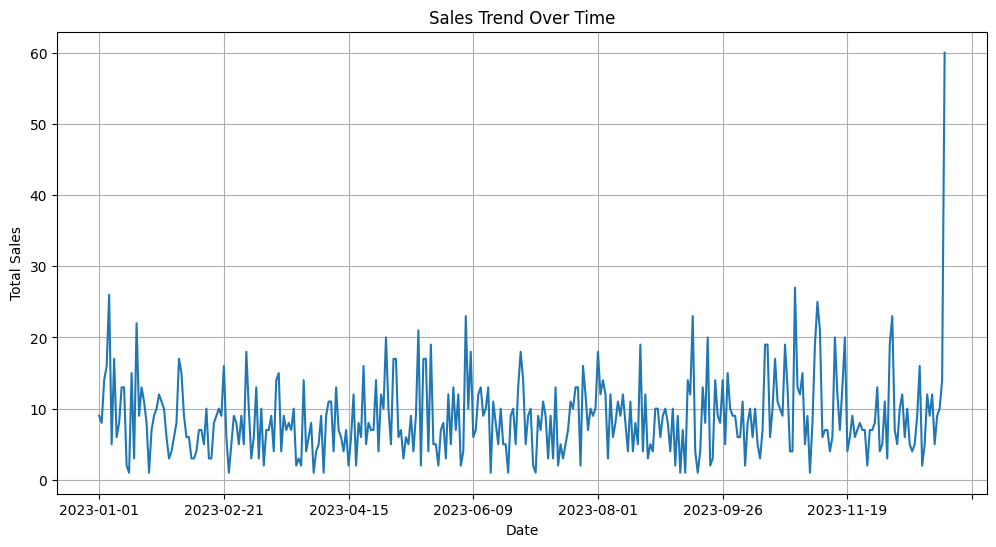

In [21]:
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Quantity'].sum().plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

<ipython-input-22-551584f1df53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


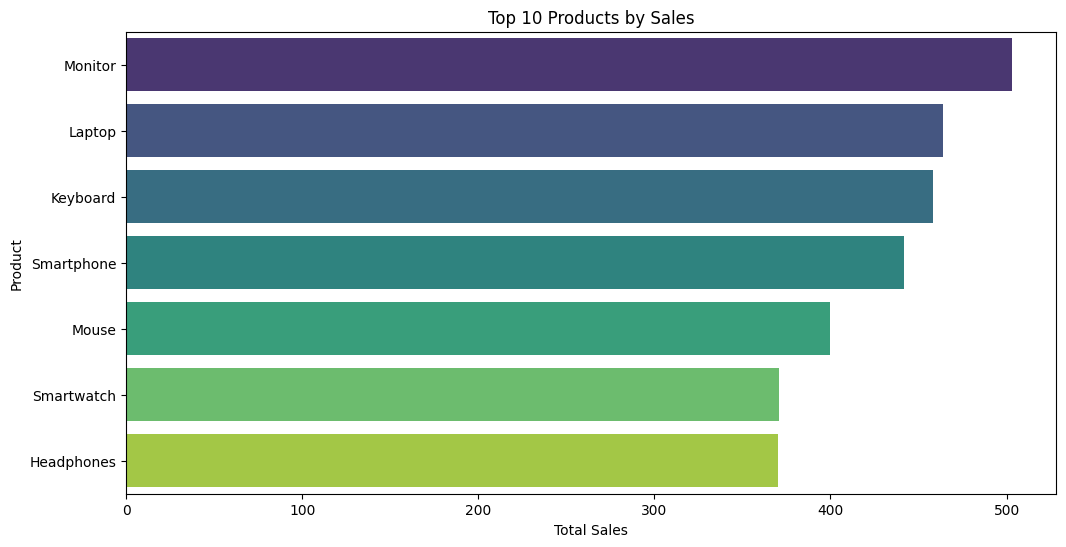

In [22]:
top_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

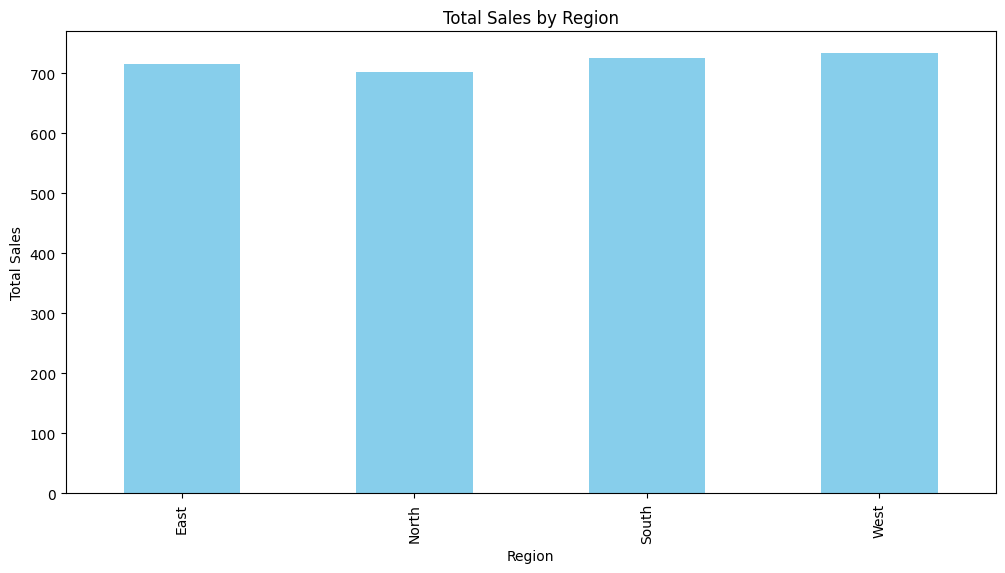

In [23]:
if 'Region' in df.columns:
    plt.figure(figsize=(12, 6))
    region_sales = df.groupby('Region')['Quantity'].sum()
    region_sales.plot(kind='bar', color='skyblue')
    plt.title('Total Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales')
    plt.show()

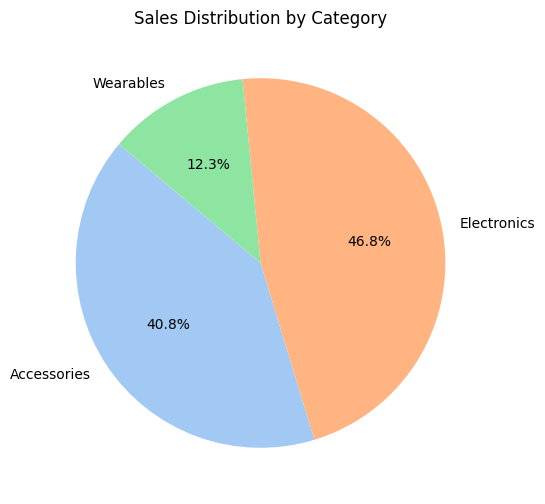

In [24]:
if 'Category' in df.columns:
    plt.figure(figsize=(12, 6))
    category_sales = df.groupby('Category')['Quantity'].sum()
    category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Sales Distribution by Category')
    plt.ylabel('')
    plt.show()